In [2]:
#Hunny kumar
### Scaling (compress my dta within the range)and Feature Engineering

import pandas as pd

In [5]:
df=pd.read_csv("https://raw.githubusercontent.com/sharmaroshan/Social-Networks-Ads/master/Social_Network_Ads.csv")

In [6]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [14]:
# Extract column Age and salary

df=df.iloc[:,2:]

In [11]:
# StandardSacaler

# SND= x-Mean/std

# train test split
# We never perform scaling on target column, it will only applied on independnt column 



In [12]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [15]:
# Purchased is my target column or feature

df.drop("Purchased",axis=1)

,Age,EstimatedSalary
0,19.0,19000.0
1,35.0,20000.0
2,26.0,43000.0
3,27.0,57000.0
4,19.0,76000.0
...,...,...
395,46.0,41000.0
396,51.0,23000.0
397,50.0,20000.0
398,36.0,33000.0


In [16]:
df["Purchased"]

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [24]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop("Purchased", axis=1), df["Purchased"], test_size=0.25)


In [26]:
df.shape

(400, 3)

In [25]:
X_train

,Age,EstimatedSalary
156,46.0,59000.0
226,36.0,126000.0
342,38.0,65000.0
48,30.0,135000.0
104,19.0,21000.0
...,...,...
216,49.0,65000.0
41,33.0,51000.0
44,28.0,84000.0
330,38.0,51000.0


In [28]:
X_test

,Age,EstimatedSalary
352,42.0,90000.0
31,27.0,137000.0
225,37.0,53000.0
320,52.0,138000.0
245,51.0,146000.0
...,...,...
291,49.0,89000.0
167,35.0,71000.0
50,24.0,32000.0
66,24.0,19000.0


In [32]:
y_train

156    0
226    1
342    0
48     1
104    0
      ..
216    0
41     0
44     0
330    0
341    0
Name: Purchased, Length: 300, dtype: int64

In [33]:
y_test

352    1
31     1
225    0
320    1
245    1
      ..
291    1
167    0
50     0
66     0
64     0
Name: Purchased, Length: 100, dtype: int64

In [29]:
## StandardScaler convert our data into Z score 
## To prevent from data leakage, we fit the scaler on training data only and then transform both training and test data.
## Preprocessing techniques can only applied on independent/training data, not on test data.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [35]:
X_train_scaled=scaler.transform(X_train)

In [36]:
X_test_scaled=scaler.transform(X_test)

In [37]:
pd.DataFrame(X_train_scaled, columns=X_train.columns)

,Age,EstimatedSalary
0,0.767483,-0.290291
1,-0.186307,1.717574
2,0.004451,-0.110483
3,-0.758581,1.987287
4,-1.807750,-1.429081
...,...,...
295,1.053620,-0.110483
296,-0.472444,-0.530036
297,-0.949339,0.458912
298,0.004451,-0.530036


In [38]:
X_train.describe()

,Age,EstimatedSalary
count,300.000000,300.000000
mean,37.953333,68686.666667
std,10.502006,33424.529207
min,18.000000,15000.000000
25%,30.000000,43000.000000
50%,37.000000,65000.000000
75%,46.000000,87250.000000
max,60.000000,150000.000000


In [40]:
X_train_scaled

array([[ 0.76748303, -0.29029135],
       [-0.18630698,  1.71757378],
       [ 0.00445102, -0.11048253],
       [-0.75858099,  1.98728701],
       [-1.80775001, -1.42908052],
       [-1.80775001, -1.30920798],
       [ 0.86286204, -1.1593673 ],
       [ 0.09983002, -0.79974966],
       [ 0.95824104,  0.63872088],
       [ 0.29058803,  0.09929442],
       [-0.47244399, -0.76978153],
       [-0.28168599,  0.30907138],
       [-0.47244399, -0.8297178 ],
       [ 2.10278906, -0.67987712],
       [-1.235476  ,  0.54881647],
       [ 0.29058803,  0.06932629],
       [ 0.19520902, -0.29029135],
       [-0.09092798,  0.03935815],
       [-0.47244399,  1.32798801],
       [-0.09092798,  0.06932629],
       [-0.75858099,  0.30907138],
       [ 1.91203105,  2.25700023],
       [ 2.00741006, -0.79974966],
       [ 0.38596703, -0.44013203],
       [-0.28168599,  2.34690464],
       [ 0.00445102,  1.29801987],
       [-0.66320199,  1.47782869],
       [-1.52161301, -0.41016389],
       [-0.28168599,

In [43]:
import numpy as np
np.round(pd.DataFrame(X_train_scaled, columns=X_train.columns).describe(),1)

,Age,EstimatedSalary
count,300.0,300.0
mean,0.0,-0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,-0.1
75%,0.8,0.6
max,2.1,2.4


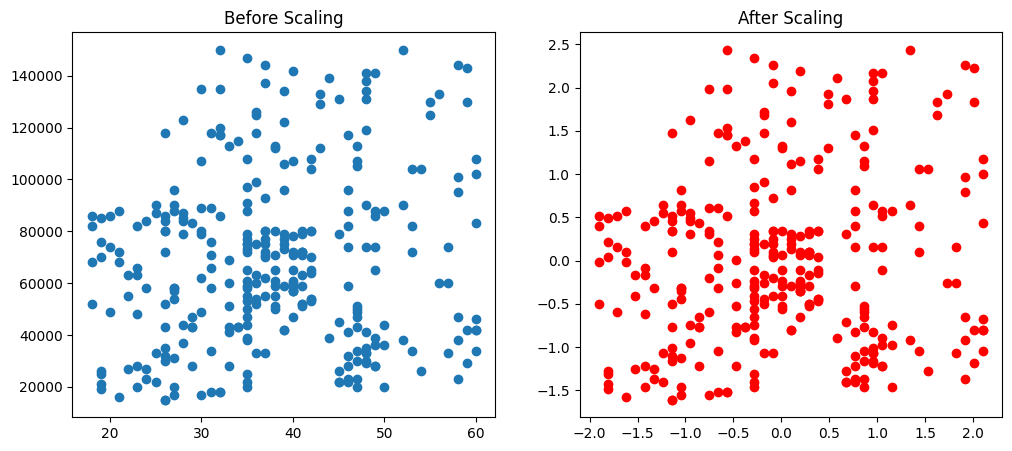

In [46]:
# Effect of scaling
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
ax2.scatter(X_train_scaled_df['Age'], X_train_scaled_df['EstimatedSalary'], color='red')
ax2.set_title('After Scaling')

plt.show()
        

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

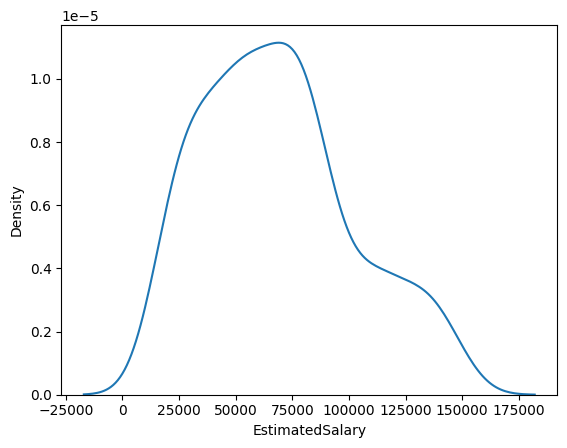

In [47]:
# model
import seaborn as sns
sns.kdeplot(X_train['EstimatedSalary'])

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

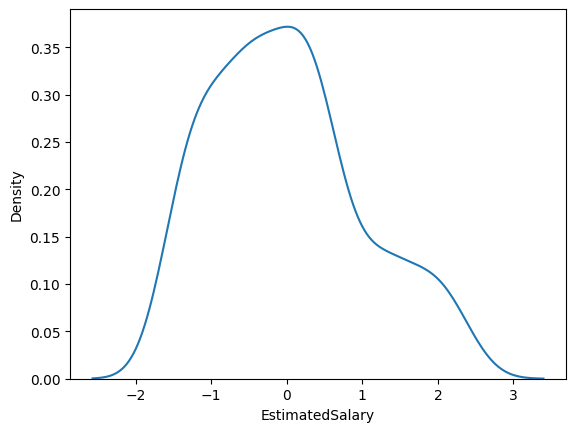

In [50]:

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
sns.kdeplot(X_train_scaled_df['EstimatedSalary'])

In [59]:
X_train.describe()

,Age,EstimatedSalary
count,300.000000,300.000000
mean,37.953333,68686.666667
std,10.502006,33424.529207
min,18.000000,15000.000000
25%,30.000000,43000.000000
50%,37.000000,65000.000000
75%,46.000000,87250.000000
max,60.000000,150000.000000


In [51]:
# How min max scaler look like
# min-max
from sklearn.preprocessing import MinMaxScaler
scaler_min_max=MinMaxScaler()
scaler_min_max.fit(X_train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [54]:
# std_scaler=x-mean/std

X_train_min_max=scaler_min_max.transform(X_train)

In [55]:
X_test_min_max=scaler_min_max.transform(X_test)

In [56]:
X_train_min_max=pd.DataFrame(X_train_min_max, columns=X_train.columns)
X_test_min_max=pd.DataFrame(X_test_min_max, columns=X_test.columns)

In [64]:
np.round(X_train_min_max.describe(),1)

,Age,EstimatedSalary
count,300.0,300.0
mean,0.5,0.4
std,0.3,0.2
min,0.0,0.0
25%,0.3,0.2
50%,0.5,0.4
75%,0.7,0.5
max,1.0,1.0


In [63]:
X_test_min_max

,Age,EstimatedSalary
0,0.571429,0.555556
1,0.214286,0.903704
2,0.452381,0.281481
3,0.809524,0.911111
4,0.785714,0.970370
...,...,...
95,0.738095,0.548148
96,0.404762,0.414815
97,0.142857,0.125926
98,0.142857,0.029630


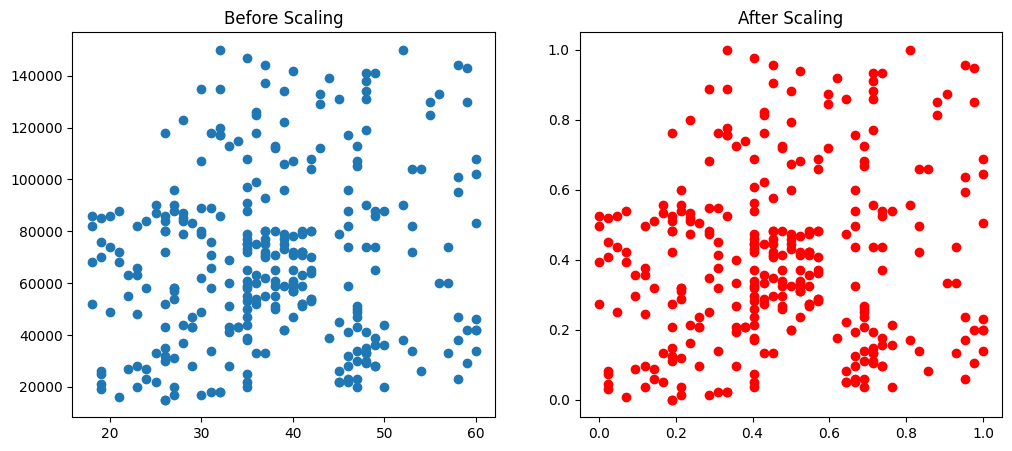

In [65]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
ax2.scatter(X_train_min_max['Age'], X_train_min_max['EstimatedSalary'], color='red')
ax2.set_title('After Scaling')

plt.show()


In [ ]:
# when we should use min-max (normalization)scaler?

## Encoding 

In [66]:
df2=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day26-ordinal-encoding/customer.csv")

In [68]:
df2.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [69]:
df2.iloc[:,2:-1]

,review,education
0,Average,School
1,Poor,UG
2,Good,PG
3,Good,PG
4,Average,UG
5,Average,School
6,Good,School
7,Poor,School
8,Average,UG
9,Good,UG


In [70]:
df2.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [71]:
X_train,X_test=train_test_split(df2,test_size=0.25)

In [72]:
X_train

,age,gender,review,education,purchased
35,74,Male,Poor,School,Yes
2,70,Female,Good,PG,No
12,51,Male,Poor,School,No
44,77,Female,Average,UG,No
41,23,Male,Good,PG,Yes
27,69,Female,Poor,PG,No
14,15,Male,Poor,PG,Yes
32,92,Male,Average,UG,Yes
37,94,Male,Average,PG,Yes
7,60,Female,Poor,School,Yes


In [73]:
X_test

,age,gender,review,education,purchased
48,39,Female,Good,UG,Yes
19,97,Male,Poor,PG,Yes
13,57,Female,Average,School,No
8,65,Female,Average,UG,No
20,57,Female,Average,School,Yes
49,25,Female,Good,UG,No
39,76,Male,Poor,PG,No
5,31,Female,Average,School,Yes
29,83,Female,Average,UG,Yes
21,32,Male,Average,PG,No


In [75]:
df2["review"].value_counts()

review
Poor       18
Good       18
Average    14
Name: count, dtype: int64

In [76]:
df2["education"].value_counts()

education
PG        18
School    16
UG        16
Name: count, dtype: int64

In [80]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']])
encoder.fit(X_train[['review', 'education']])

,categories,"[['Poor', 'Average', ...], ['School', 'UG', ...]]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,unknown_value,None
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


In [91]:
X_train_encode=encoder.transform(X_train[['review', 'education']])

In [92]:
X_train_encode

array([[0., 0.],
       [2., 2.],
       [0., 0.],
       [1., 1.],
       [2., 2.],
       [0., 2.],
       [0., 2.],
       [1., 1.],
       [1., 2.],
       [0., 0.],
       [2., 1.],
       [0., 1.],
       [0., 1.],
       [0., 2.],
       [2., 2.],
       [2., 0.],
       [0., 2.],
       [2., 0.],
       [2., 0.],
       [0., 0.],
       [1., 0.],
       [0., 2.],
       [1., 1.],
       [0., 0.],
       [2., 2.],
       [2., 0.],
       [2., 0.],
       [1., 1.],
       [0., 2.],
       [1., 0.],
       [0., 2.],
       [2., 2.],
       [2., 1.],
       [0., 1.],
       [0., 1.],
       [1., 2.],
       [2., 1.]])

In [93]:
X_test_encode=encoder.transform(X_test[['review', 'education']])

In [94]:
X_test_encode

array([[2., 1.],
       [0., 2.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [2., 1.],
       [0., 2.],
       [1., 0.],
       [1., 1.],
       [1., 2.],
       [2., 1.],
       [2., 2.],
       [2., 0.]])

In [95]:
df2["gender"]

0     Female
1     Female
2     Female
3     Female
4     Female
5     Female
6       Male
7     Female
8     Female
9       Male
10    Female
11      Male
12      Male
13    Female
14      Male
15      Male
16      Male
17    Female
18      Male
19      Male
20    Female
21      Male
22    Female
23    Female
24    Female
25    Female
26    Female
27    Female
28      Male
29    Female
30      Male
31    Female
32      Male
33    Female
34      Male
35      Male
36    Female
37      Male
38    Female
39      Male
40      Male
41      Male
42    Female
43      Male
44    Female
45      Male
46    Female
47    Female
48    Female
49    Female
Name: gender, dtype: object

In [97]:
df2=df2[['gender','age']]

In [98]:
df2

,gender,age
0,Female,30
1,Female,68
2,Female,70
3,Female,72
4,Female,16
5,Female,31
6,Male,18
7,Female,60
8,Female,65
9,Male,74


In [109]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop="first",sparse_output=False, dtype=np.int32)
ohe.fit(df2[["gender"]])

,categories,'auto'
,drop,'first'
,sparse_output,False
,dtype,<class 'numpy.int32'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [110]:
ohe

,categories,'auto'
,drop,'first'
,sparse_output,False
,dtype,<class 'numpy.int32'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [114]:
ohe.transform(df2[["gender"]])

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0]])

In [116]:
ohe

,categories,'auto'
,drop,'first'
,sparse_output,False
,dtype,<class 'numpy.int32'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [153]:
### Missing values

df3=pd.read_csv("titanic_train.csv")

In [154]:
df3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [121]:
df3=df3[["Age","Fare","SibSp","Survived"]]

In [122]:
df3

,Age,Fare,SibSp,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,1,0
889,26.0,30.0000,0,1


In [124]:
df3.head()

,Age,Fare,SibSp,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [125]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [128]:
df3.isnull().mean()

Age         0.198653
Fare        0.000000
SibSp       0.000000
Survived    0.000000
dtype: float64

In [129]:
## numeric--->mean.median
## cat --->mode

X_train, X_test = train_test_split(df3, test_size=0.25)



In [130]:
X_train

,Age,Fare,SibSp,Survived
387,36.0,13.0000,0,1
135,23.0,15.0458,0,0
100,28.0,7.8958,0,0
651,18.0,23.0000,0,1
456,65.0,26.5500,0,0
...,...,...,...,...
767,30.5,7.7500,0,0
467,56.0,26.5500,0,0
842,30.0,31.0000,0,1
690,31.0,57.0000,1,1


In [131]:
X_test

,Age,Fare,SibSp,Survived
394,24.0,16.7000,0,1
615,24.0,65.0000,1,1
266,16.0,39.6875,4,0
716,38.0,227.5250,0,1
110,47.0,52.0000,0,0
...,...,...,...,...
416,34.0,32.5000,1,1
613,NaN,7.7500,0,0
205,2.0,10.4625,0,0
530,2.0,26.0000,1,1


In [133]:
## calculate mean
mean_age=X_train["Age"].mean()

In [136]:
X_train["Age"].fillna(mean_age).isnull().sum()

0

In [137]:
# If there is an any outlier in the data, we can use median instead of mean
median_age=X_train["Age"].median()

In [138]:
median_age

28.0

In [142]:
X_train["Age"].fillna(median_age)

387    36.0
135    23.0
100    28.0
651    18.0
456    65.0
       ... 
767    30.5
467    56.0
842    30.0
690    31.0
607    27.0
Name: Age, Length: 668, dtype: float64

In [ ]:
## SKlearn provides a function to fill missing values

# Mode for categorical data
from sklearn.impute import SimpleImputer


In [156]:
df3["Cabin"].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [157]:
df3["Cabin"].fillna(df3["Cabin"].mode()[0])

0      B96 B98
1          C85
2      B96 B98
3         C123
4      B96 B98
        ...   
886    B96 B98
887        B42
888    B96 B98
889       C148
890    B96 B98
Name: Cabin, Length: 891, dtype: object

In [ ]:
## Multivariant fill the value more than two column.
## knnimputer